---

# Homework:

Find the text to three different Civil War-Era (1851-1875) novels on [Project Gutenberg](https://www.gutenberg.org/) (maybe mentioned in our reading?!). Make sure you click for the `.txt` files, and use a `GET` request from the `requests` library to get the text. 

First do some exploration on parts of speech. Then combine the NER location frequencies and plot a choropleth. Look closely at the words plotted. How did the NER model do? How does your choropleth look compared to Wilkens'?

In [2]:
!python -m spacy download en



    100% |████████████████████████████████| 52.2MB 77.4MB/s ta 0:00:011

    Linking successful

    /srv/app/venv/lib/python3.6/site-packages/en_core_web_sm/en_core_web_sm-1.2.0
    --> /srv/app/venv/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en').



In [3]:
from datascience import *
import spacy

In [4]:
nlp = spacy.load('en', parser=False)

In [5]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [6]:
import requests

In [7]:
marble_faun = requests.get('https://www.gutenberg.org/files/2181/2181-0.txt')
marble_faun = marble_faun.text
marble_faun

'\ufeffProject Gutenberg’s The Marble Faun, Volume I., by Nathaniel Hawthorne\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: The Marble Faun, Volume I.\r\n       The Romance of Monte Beni\r\n\r\nAuthor: Nathaniel Hawthorne\r\n\r\nRelease Date: February 25, 2006 [EBook #2181]\r\nLast Updated: December 15, 2016\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK THE MARBLE FAUN, VOLUME I. ***\r\n\r\n\r\n\r\n\r\nProduced by Michael Pullen and David Widger\r\n\r\n\r\n\r\n\r\n\r\nTHE MARBLE FAUN\r\n\r\nor The Romance of Monte Beni\r\n\r\n\r\nBy Nathaniel Hawthorne\r\n\r\n\r\nIn Two Volumes\r\n\r\nThis is Volume One\r\n\r\n\r\n\r\n\r\nContents\r\n\r\n     Volume I\r\n\r\n     I       MIRIAM, HILDA, KEN

In [8]:
marble_faun = marble_faun.replace('\r\n', ' ')
marble_faun

'\ufeffProject Gutenberg’s The Marble Faun, Volume I., by Nathaniel Hawthorne  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: The Marble Faun, Volume I.        The Romance of Monte Beni  Author: Nathaniel Hawthorne  Release Date: February 25, 2006 [EBook #2181] Last Updated: December 15, 2016  Language: English  Character set encoding: UTF-8  *** START OF THIS PROJECT GUTENBERG EBOOK THE MARBLE FAUN, VOLUME I. ***     Produced by Michael Pullen and David Widger      THE MARBLE FAUN  or The Romance of Monte Beni   By Nathaniel Hawthorne   In Two Volumes  This is Volume One     Contents       Volume I       I       MIRIAM, HILDA, KENYON, DONATELLO      II      THE FAUN      III     SUBTERRANEAN REMINISCENCES      IV      THE SPECTRE OF THE CATACOMB      V       MIRIAM’S STUDIO    

In [9]:
marble_faun = marble_faun[2550:]
marble_faun

'  Volume I     CHAPTER I   MIRIAM, HILDA, KENYON, DONATELLO   Four individuals, in whose fortunes we should be glad to interest the reader, happened to be standing in one of the saloons of the sculpture-gallery in the Capitol at Rome. It was that room (the first, after ascending the staircase) in the centre of which reclines the noble and most pathetic figure of the Dying Gladiator, just sinking into his death-swoon. Around the walls stand the Antinous, the Amazon, the Lycian Apollo, the Juno; all famous productions of antique sculpture, and still shining in the undiminished majesty and beauty of their ideal life, although the marble that embodies them is yellow with time, and perhaps corroded by the damp earth in which they lay buried for centuries. Here, likewise, is seen a symbol (as apt at this moment as it was two thousand years ago) of the Human Soul, with its choice of Innocence or Evil close at hand, in the pretty figure of a child, clasping a dove to her bosom, but assaulted 

In [10]:
moby_dick = requests.get('http://www.gutenberg.org/files/2701/2701.txt')
moby_dick = moby_dick.text
moby_dick = moby_dick.replace('\r\n', ' ')
moby_dick = moby_dick[23048:]
moby_dick

'CHAPTER 1. Loomings.   Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people\'s hats off--then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If

In [16]:
innocents_abroad = requests.get('http://www.gutenberg.org/cache/epub/5688/pg5688.txt')
innocents_abroad = innocents_abroad.text
innocents_abroad = innocents_abroad.replace('\r\n', ' ')
innocents_abroad = innocents_abroad[600:]
innocents_abroad = innocents_abroad.replace('CHAPTER', '') # I have to do this or else 'Chapter' shows up as a most common noun
innocents_abroad

'     INNOCENTS ABROAD  by Mark Twain  [From an 1869--1st Edition]  Part 1.                                   CONTENTS                                    I. Popular Talk of the Excursion--Programme of the Trip--Duly Ticketed for the Excursion--Defection of the Celebrities                                  II. Grand Preparations--An Imposing Dignitary--The European Exodus --Mr. Blucher\'s Opinion--Stateroom No. 10--The Assembling of the Clans --At Sea at Last                                  III. "Averaging" the Passengers--Far, far at Sea.--Tribulation among the Patriarchs--Seeking Amusement under Difficulties--Five Captains in the Ship                                  IV. The Pilgrims Becoming Domesticated--Pilgrim Life at Sea --"Horse-Billiards"--The "Synagogue"--The Writing School--Jack\'s "Journal" --The "Q. C. Club"--The Magic Lantern--State Ball on Deck--Mock Trials --Charades--Pilgrim Solemnity--Slow Music--The Executive Officer Delivers an Opinion                                

In [17]:
novel_list = [marble_faun, moby_dick, innocents_abroad]

for each_novel in novel_list:
    def title(novel):
        if novel == marble_faun:
            return 'The Marble Faun'
        elif novel == moby_dick:
            return 'Moby Dick'
        else:
            return 'Innocents Abroad'
    novel_parsed = nlp(each_novel)
    novel_table = tablefy(novel_parsed)
    top_3_nouns = novel_table.where('POS', 'NOUN').group('Word').sort('count', descending = True).column('Word')[0:3]
    top_3_verbs = novel_table.where('POS', 'VERB').group('Word').sort('count', descending = True).column('Word')[0:3]
    top_3_lemma_nouns = novel_table.where('POS', 'NOUN').group('Lemma').sort('count', descending = True).column('Lemma')[0:3]
    top_3_lemma_verbs = novel_table.where('POS', 'VERB').group('Lemma').sort('count', descending = True).column('Lemma')[0:3]
    top_3_nostop_nouns = novel_table.where('Stop Word', False).where('POS', 'NOUN').group('Word').sort('count', descending = True).column('Word')[0:3]
    top_3_nostop_verbs = novel_table.where('Stop Word', False).where('POS', 'VERB').group('Word').sort('count', descending = True).column('Word')[0:3]
    print('The three most common nouns in ', title(each_novel), ' were: ', top_3_nouns)
    print('The three most common verbs in ', title(each_novel), ' were: ', top_3_verbs)
    print('The three most common lemmatized nouns in ', title(each_novel), ' were: ', top_3_lemma_nouns)
    print('The three most common lemmatized verbs in ', title(each_novel), ' were: ', top_3_lemma_verbs)
    print('The three most common non-stop word nouns in ', title(each_novel), ' were: ', top_3_nostop_nouns)
    print('The three most common non-stop word verbs in ', title(each_novel), ' were: ', top_3_nostop_verbs)
   

The three most common nouns in  The Marble Faun  were:  ['what' 'life' 'who']
The three most common verbs in  The Marble Faun  were:  ['was' 'is' 'had']
The three most common lemmatized nouns in  The Marble Faun  were:  ['what' 'man' 'friend']
The three most common lemmatized verbs in  The Marble Faun  were:  ['be' 'have' 'say']
The three most common non-stop word nouns in  The Marble Faun  were:  ['life' 'heart' 'sculptor']
The three most common non-stop word verbs in  The Marble Faun  were:  ['said' 'know' 'come']
The three most common nouns in  Moby Dick  were:  ['whale' 'man' 'ship']
The three most common verbs in  Moby Dick  were:  ['is' 'was' 'be']
The three most common lemmatized nouns in  Moby Dick  were:  ['whale' 'man' 'ship']
The three most common lemmatized verbs in  Moby Dick  were:  ['be' 'have' 'do']
The three most common non-stop word nouns in  Moby Dick  were:  ['whale' 'man' 'ship']
The three most common non-stop word verbs in  Moby Dick  were:  ["'s" 'said' 'seen']
T

In [18]:
all_novels = marble_faun + moby_dick + innocents_abroad
all_novels

'  Volume I     CHAPTER I   MIRIAM, HILDA, KENYON, DONATELLO   Four individuals, in whose fortunes we should be glad to interest the reader, happened to be standing in one of the saloons of the sculpture-gallery in the Capitol at Rome. It was that room (the first, after ascending the staircase) in the centre of which reclines the noble and most pathetic figure of the Dying Gladiator, just sinking into his death-swoon. Around the walls stand the Antinous, the Amazon, the Lycian Apollo, the Juno; all famous productions of antique sculpture, and still shining in the undiminished majesty and beauty of their ideal life, although the marble that embodies them is yellow with time, and perhaps corroded by the damp earth in which they lay buried for centuries. Here, likewise, is seen a symbol (as apt at this moment as it was two thousand years ago) of the Human Soul, with its choice of Innocence or Evil close at hand, in the pretty figure of a child, clasping a dove to her bosom, but assaulted 

In [19]:
all_novels_parsed = nlp(all_novels)
all_novels_parsed

  Volume I     CHAPTER I   MIRIAM, HILDA, KENYON, DONATELLO   Four individuals, in whose fortunes we should be glad to interest the reader, happened to be standing in one of the saloons of the sculpture-gallery in the Capitol at Rome. It was that room (the first, after ascending the staircase) in the centre of which reclines the noble and most pathetic figure of the Dying Gladiator, just sinking into his death-swoon. Around the walls stand the Antinous, the Amazon, the Lycian Apollo, the Juno; all famous productions of antique sculpture, and still shining in the undiminished majesty and beauty of their ideal life, although the marble that embodies them is yellow with time, and perhaps corroded by the damp earth in which they lay buried for centuries. Here, likewise, is seen a symbol (as apt at this moment as it was two thousand years ago) of the Human Soul, with its choice of Innocence or Evil close at hand, in the pretty figure of a child, clasping a dove to her bosom, but assaulted b

In [20]:
all_ner_tab = Table()
all_ner_tab.append_column(label="NER Label", values=[ent.label_ for ent in all_novels_parsed.ents])
all_ner_tab.append_column(label="NER Text", values=[ent.text for ent in all_novels_parsed.ents])
all_ner_tab.show()

In [22]:
from collections import Counter

places = []

for ent in all_novels_parsed.ents:
    if ent.label_ == "GPE":
        places.append(ent.text.strip())

places = Counter(places)
places.most_common()

[('Ahab', 417),
 ('Rome', 95),
 ('Queequeg', 94),
 ('Leviathan', 45),
 ('Stubb', 40),
 ('Flask', 35),
 ('Captain', 34),
 ('the United States', 32),
 ('Greenland', 28),
 ('Tashtego', 26),
 ('Spain', 23),
 ('Donatello', 21),
 ('Italy', 21),
 ('Tangier', 21),
 ('Thou', 19),
 ('Bildad', 18),
 ('France', 18),
 ('Perth', 18),
 ('Moorish', 17),
 ('America', 16),
 ('Pequod', 15),
 ('England', 14),
 ('New Bedford', 13),
 ('Paris', 13),
 ('Cape', 12),
 ('', 11),
 ('Jerusalem', 10),
 ('Japan', 10),
 ('London', 10),
 ('Lima', 10),
 ('Ishmael', 9),
 ('heaven', 9),
 ('Guernsey', 9),
 ('Florence', 8),
 ('China', 8),
 ('Jonah', 8),
 ('Peleg', 8),
 ('Daggoo', 8),
 ('Steelkilt', 8),
 ('Aye', 8),
 ('Egypt', 7),
 ('U.S.', 7),
 ('Joppa', 7),
 ('New York', 7),
 ('Naples', 7),
 ('Roman', 6),
 ('Providence', 6),
 ('Trevi', 6),
 ('Virginia', 6),
 ('Sumatra', 6),
 ('Venice', 6),
 ('Parsee', 6),
 ('Hilda’s', 5),
 ('Spring', 5),
 ('Trajan', 5),
 ('Mississippi', 5),
 ('New Zealand', 5),
 ('AHAB', 5),
 ('Starbuck',

In [23]:
with open('data/us_states.txt', 'r') as f:
    states = f.read().split('\n')
    states = [x.strip() for x in states]

states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [24]:
from geopy.geocoders import Nominatim
from datascience import *
import time

geolocator = Nominatim(timeout=10)

geo_tab = Table(["latitude", "longitude", "name", "state"])

for name in places.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(places[name] - 1):
            geo_tab.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for Rome...
Getting information for Antinous...
Getting information for Amazon...
Getting information for Romulus...
Getting information for Etruscan...
Getting information for Roman...
Getting information for Pentelic...
Getting information for Arcadia...
Getting information for Donatello...
Getting information for Satyrs...
Getting information for Gothic...
Getting information for Providence...
Getting information for Kenyon...
Getting information for Tieck...
Getting information for St. Calixtus...
Getting information for Memmius...
Getting information for Scripture...
Getting information for Italy...
Getting information for Naiad’s...
Getting information for Quirinal...
Getting information for Arcady...
Getting information for however...
Getting information for Unframed...
Getting information for Florence...
Getting information for Virgin...
Getting information for Antoninus...
Getting information for Hilda’s...
Getting information for Beholding...
Getting infor

Getting information for Tahiti...
Getting information for Pirohitee...
Getting information for Cattegat...
Getting information for ...
Getting information for BELFAST...
Getting information for Povelson...
Getting information for West Passage...
Getting information for Portugal...
Getting information for Syracuse...
Getting information for Arkansas...
Getting information for Highland...
Getting information for Thermes...
Getting information for Caryatid...
Getting information for Pegu...
Getting information for the Great Spirit...
Getting information for St. John...
Getting information for Coleridge...
Getting information for Ohio...
Getting information for Albatross...
Getting information for Froissart...
Getting information for Whitsuntide...
Getting information for White Friar...
Getting information for Central Europe...
Getting information for Blocksburg...
Getting information for Lima...
Getting information for Vermont...
Getting information for Oregon...
Getting information for L

Getting information for Lightning...
Getting information for say'st...
Getting information for Turk's...
Getting information for FROCK...
Getting information for Albemarle...
Getting information for Guinea...
Getting information for Crete...
Getting information for Natural Bridge...
Getting information for Eddystone...
Getting information for Unmindful...
Getting information for Vesuvius...
Getting information for Pole...
Getting information for Ho...
Getting information for a United States...
Getting information for Majestic Stranger...
Getting information for the Empire of Morocco...
Getting information for Morocco...
Getting information for Marseilles...
Getting information for Marengo...
Getting information for Stone----An Unpleasant Adventure...
Getting information for the Winged Lion...
Getting information for Ungrateful City--...
Getting information for A Fallen Republic...
Getting information for Naples...
Getting information for Quarantine...
Getting information for Unoccupied

In [25]:
geo_tab.show(5)

In [26]:
geo_tab.group(['latitude', 'longitude', 'name', 'state']).sort('count', descending = True).show()

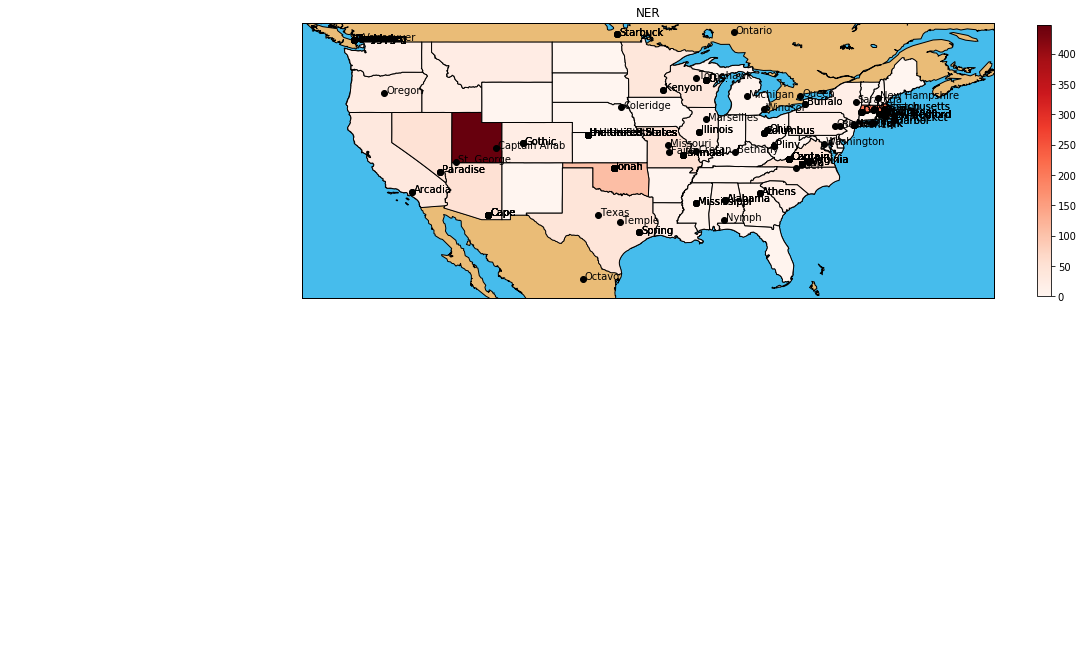

In [27]:
%matplotlib inline

from scripts.choropleth import us_choropleth
us_choropleth(geo_tab)

So it would seem Utah was a particular center of literary attention for Civil War era novels, but that's not quite accurate. NER thinks that Ahab, the main character of Moby Dick, is a place in Utah, which explains the strange distribution. Even worse, the the model has also claimed many other Moby Dick characters such as Queequeg, Stubb, Flask, and Tashtego, which number among the highest frequencies, as geographic locations. So this all in all didn't do an excellent job. 